<class 'numpy.int16'>
Samping Frequency : 16000 [Hz]
Sampling Size: 2 [Byte]
Number of Channels: 1
Number of Samples: 51040


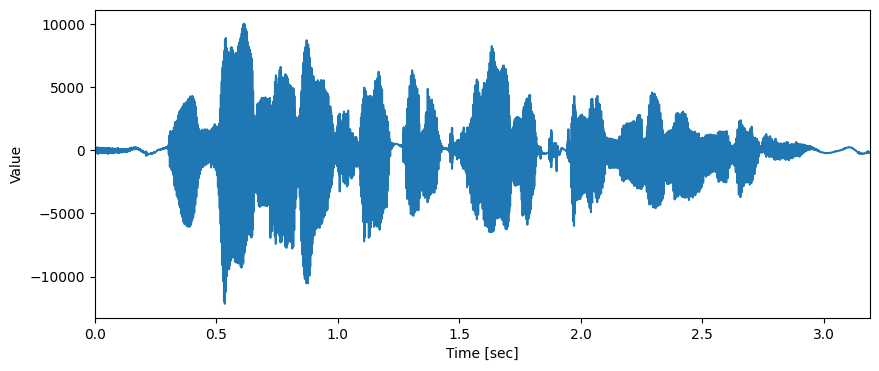

In [17]:
#wav데이터를 읽기 위한 모듈 import
import wave
#수치연산용 모듈 import
import numpy as np
#plot용 모듈 import
import matplotlib.pyplot as plt

# 파이썬 파일을 직접실행했을 때만 해당 구문을 수행(import할 경우 수행 안됨)
if __name__ == "__main__": 
    #wav파일 열기
    wav_file = './data/wav/BASIC5000_0001.wav'
    #파형을 출력하는 파일(png 파일)
    out_plot = './plot.png'
    
    #wav파일을 열고 이후 처리를 진행한다
    # with구문은 db나 파일 스트림을 열 때 유용함(close함수를 자동으로 호출하기 때문)
    with wave.open(wav_file) as wav:
        #샘플링 주파수(Hz) 확인
        sampling_frequency = wav.getframerate()
        #샘플사이즈(Byte) 확인
        sample_size = wav.getsampwidth()
        #채널수 확인
        num_channels = wav.getnchannels()
        #wav데이터 샘플 수 확인
        num_samples = wav.getnframes()
        #wav데이터 읽기
        waveform = wav.readframes(num_samples)
        #읽어드린 데이터는 바이너리값(16bit integer)이므로 수치(정수)로 변환한다
        waveform = np.frombuffer(waveform, dtype=np.int16)
    
    print(type(waveform[0]))
    
    #읽어온 wav파일의 정보 표시하기
    print('Samping Frequency : %d [Hz]' % sampling_frequency)
    print('Sampling Size: %d [Byte]' % sample_size)
    print('Number of Channels: %d' % num_channels)
    print('Number of Samples: %d' % num_samples)
    
    #횡축(시간축)생성하기
    time_axis = np.arange(num_samples) / sampling_frequency # ndarray type
    #시각화 영역 새성
    plt.figure(figsize=(10,4))
    #파형 그리기
    plt.plot(time_axis, waveform)
    #횡축과 종축 라벨값 정의
    plt.xlabel("Time [sec]")
    plt.ylabel("Value")
    #횡축 표시 영역을 0에서 파형 종료 시각으로 제한
#     print('%.2f' % (num_samples/sampling_frequency))
    plt.xlim([0, num_samples/sampling_frequency])
    #plot저장
    plt.savefig(out_plot)